In [1]:
import numpy as np #basic numeric calculation
import pandas as pd #split-apply-combine operations on dataframe
import geopandas as gpd #geometric manipulations on GeoDataFrames
import matplotlib.pyplot as plt #plotting tool
from matplotlib.patches import RegularPolygon #drawing hexagons
import shapely #to attribute geometric properties for shapes
from shapely.geometry import Polygon

In [2]:
berlinhoods = gpd.read_file('D:/urbban/berlin_data\lo2/RBS_OD_LOR_2015_12.shp')
berlinhoods = gpd.GeoDataFrame(berlinhoods,geometry='geometry',crs={'init':'epsg:25833'})

In [3]:
berlinhoods.columns

Index(['PLR', 'PLRNAME', 'BZR', 'BZRNAME', 'PGR', 'PGRNAME', 'BEZ', 'BEZNAME',
       'dissolve', 'geometry'],
      dtype='object')

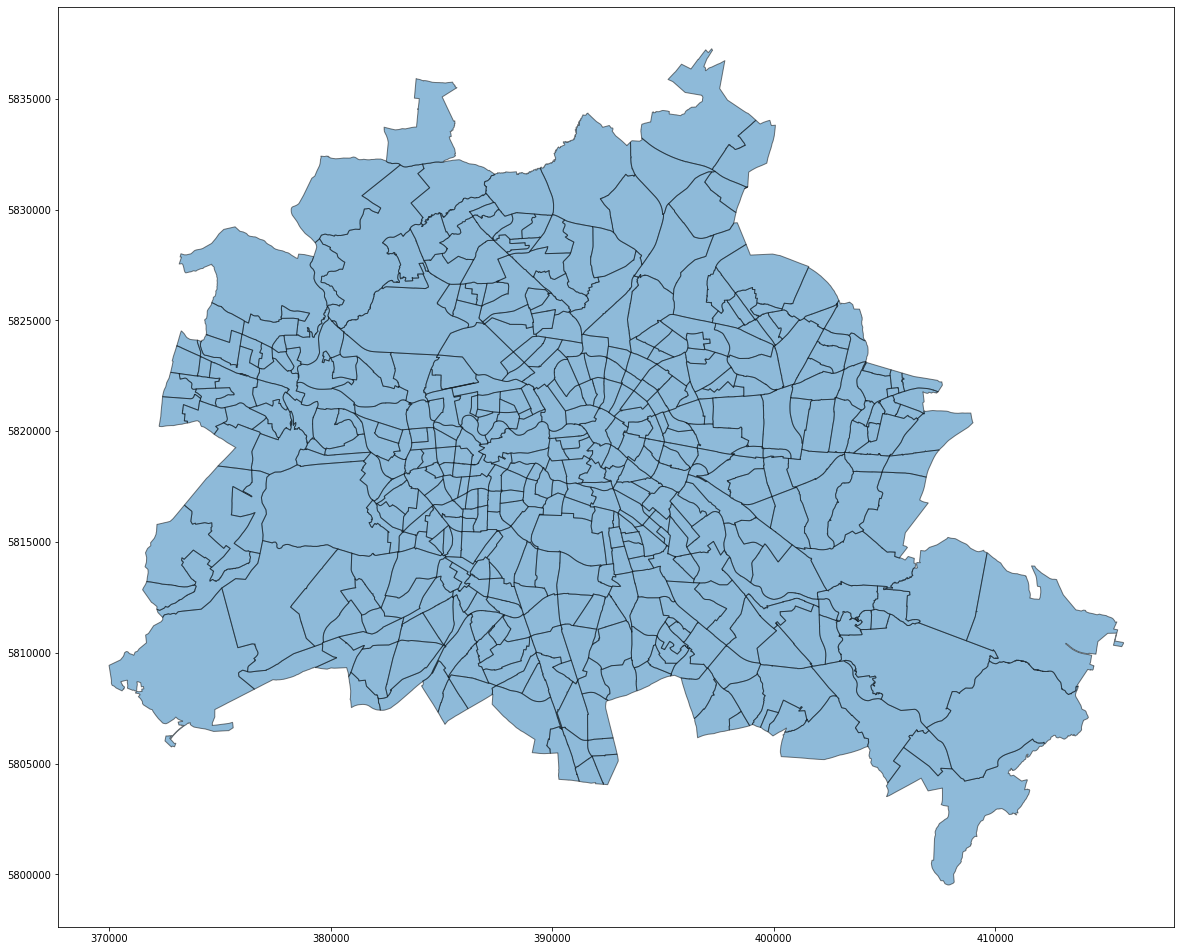

In [4]:
berlinhoods.plot(alpha=0.5,figsize=(20,60),edgecolor='black')

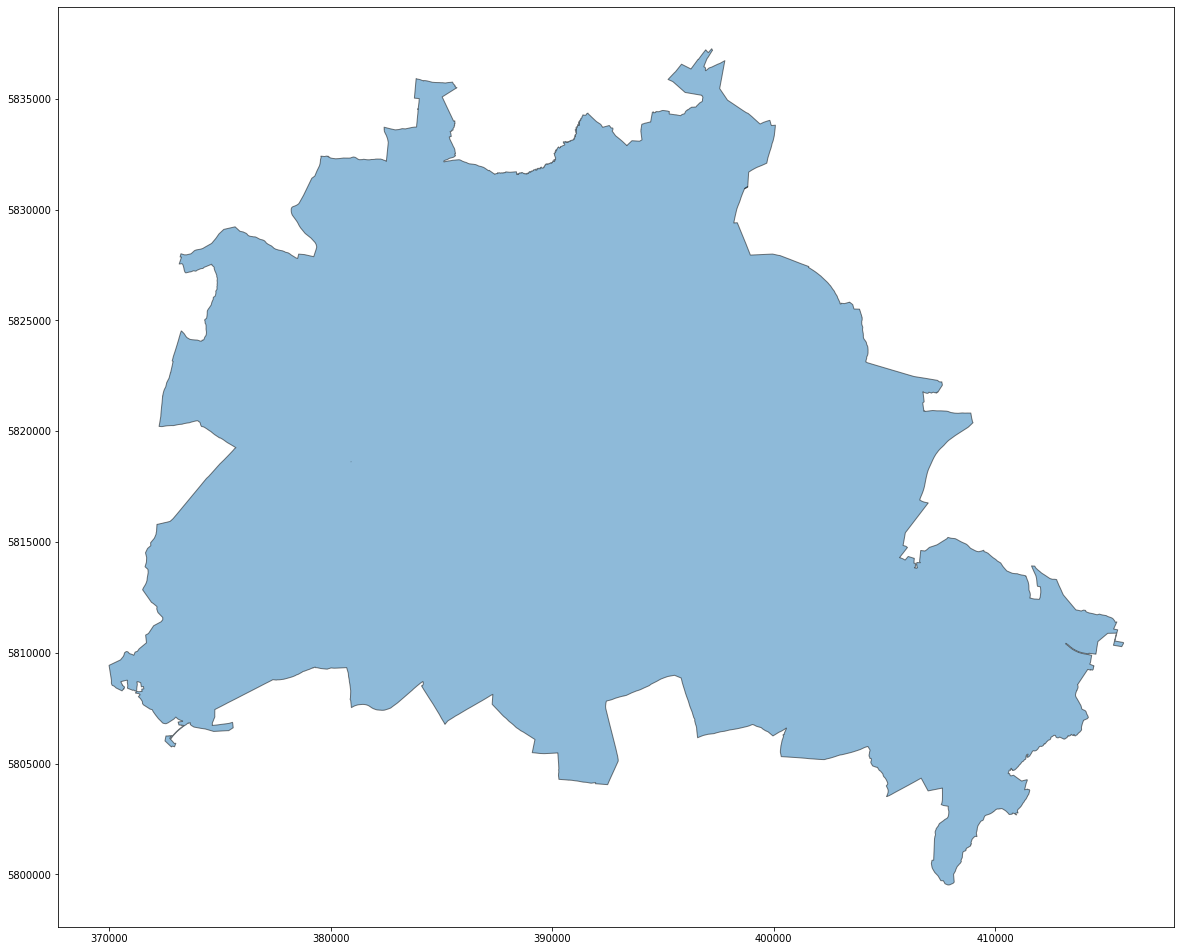

In [5]:
TO_boundary = berlinhoods.dissolve(by='dissolve')
TO_boundary = TO_boundary[['geometry']] # keep only 'geometry' 
TO_boundary.plot(alpha=0.5,edgecolor='black',figsize=(20,60))

In [6]:
def haversine(coord1, coord2):
    # Coordinates in decimal degrees (e.g. 43.60, -79.49)
    lon1, lat1 = coord1
    lon2, lat2 = coord2
    R = 6371000  # radius of Earth in meters
    phi_1 = np.radians(lat1)
    phi_2 = np.radians(lat2)
    delta_phi = np.radians(lat2 - lat1)
    delta_lambda = np.radians(lon2 - lon1)
    a = np.sin(delta_phi / 2.0) ** 2 + np.cos(phi_1) * np.cos(phi_2) * np.sin(delta_lambda / 2.0) ** 2
    c = 2 * np.arctan2(np.sqrt(a),np.sqrt(1 - a))
    meters = R * c  # output distance in meters
    km = meters / 1000.0  # output distance in kilometers
    meters = round(meters)
    km = round(km, 3)
    #print(f"Distance: {meters} m")
    #print(f"Distance: {km} km")
    return meters

In [7]:
xmin,ymin,xmax,ymax = berlinhoods.total_bounds # lat-long of 2 corners
#East-West extent of Toronto = 42193 metres
EW = haversine((xmin,ymin),(xmax,ymin))
# North-South extent of Toronto = 30519 metres
NS = haversine((xmin,ymin),(xmin,ymax))
# diamter of each hexagon in the grid = 900 metres
d = 900
# horizontal width of hexagon = w = d* sin(60)
w = d*np.sin(np.pi/3)
# Approximate number of hexagons per row = EW/w 
n_cols = int(EW/w)+1
# Approximate number of hexagons per column = NS/d
n_rows = int(NS/d)+ 1

In [ ]:
from matplotlib.patches import RegularPolygon

ax = TO_boundary.boundary.plot(edgecolor='black',figsize=(20,60))
w = (xmax-xmin)/n_cols # width of hexagon
d = w/np.sin(np.pi/3) #diameter of hexagon
array_of_hexes = []
for rows in range(0,n_rows):
    hcoord = np.arange(xmin,xmax,w) + (rows%2)*w/2
    vcoord = [ymax- rows*d*0.75]*n_cols
    for x, y in zip(hcoord, vcoord):#, colors):
        hexes = RegularPolygon((x, y), numVertices=6, radius=d/2, alpha=0.2, edgecolor='k')
        verts = hexes.get_path().vertices
        trans = hexes.get_patch_transform()
        points = trans.transform(verts)
        array_of_hexes.append(Polygon(points))
        ax.add_patch(hexes)
ax.set_xlim([xmin, xmax])
ax.set_ylim([ymin, ymax])
plt.show()